# Import libraries

In [1]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

2023-01-29 21:25:49.925047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 21:25:50.131250: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-29 21:25:50.756588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-29 21:25:50.756670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

# Load models

In [2]:
##Stable Diffusion 1-4
sdf_1_4_path = "CompVis/stable-diffusion-v1-4"
sdf_1_4 = StableDiffusionPipeline.from_pretrained(sdf_1_4_path, torch_dtype=torch.float16)
sdf_1_4.to("cuda")

##Our fine tuned model
ai4innov_model_path = "sd-ai4innov-model/checkpoint-20000/"
ai4innov_model = StableDiffusionPipeline.from_pretrained(ai4innov_model_path, torch_dtype=torch.float16)
ai4innov_model.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.12.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# Generate images

In [ ]:
def display_images(prompts_list:list):                
    list_image1 =  []
    list_image2 =  []

    for prompt in prompts_list:

              ima1 = sdf_1_4(prompt=prompt).images[0]
              list_image1.append(ima1)     

              ima2 = ai4innov_model(prompt=prompt).images[0]
              list_image2.append(ima2)


    #fig, ax = plt.subplots(len(prompts_list),2)
    plt.rcParams.update({'font.size': 5})
    
    for i in range(len(prompts_list)):
        plt.figure() ; fig, ax = plt.subplots(1,2)
        ax[0].imshow(list_image1[i])
        ax[0].axis('off')
        ax[0].set_title(f'{prompts_list[i]} (Stable Diffusion 1-4)')

        ax[1].imshow(list_image2[i])
        ax[1].axis('off')
        ax[1].set_title(f'{prompts_list[i]} (Ai4Innov model)')


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

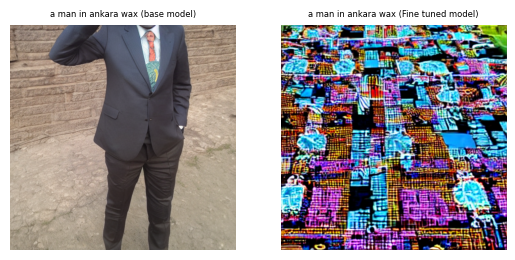

<Figure size 640x480 with 0 Axes>

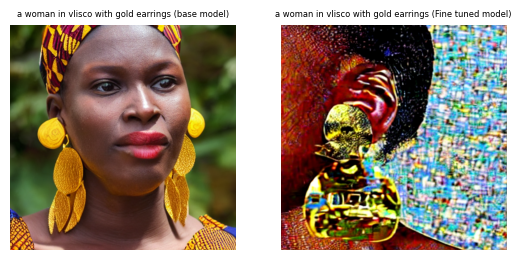

In [ ]:
prompts_list = ["a man in ankara wax", "a woman in vlisco with gold earrings"]   
display_images(prompts_list)